# EPL Match Outcome Prediction

I want to use supervised learning techniques to predict premier league match outcomes based on historical data. I watch soccer regularly and I think this could be important for fans, betting books, coaches, etc.

https://github.com/nich5850/SupervisedLearningFinal

## Exploratory Data Analysis

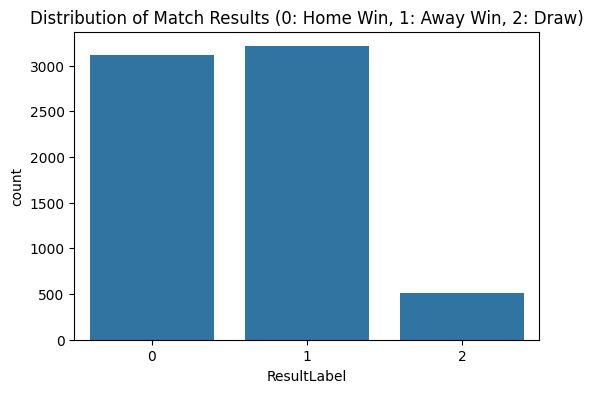

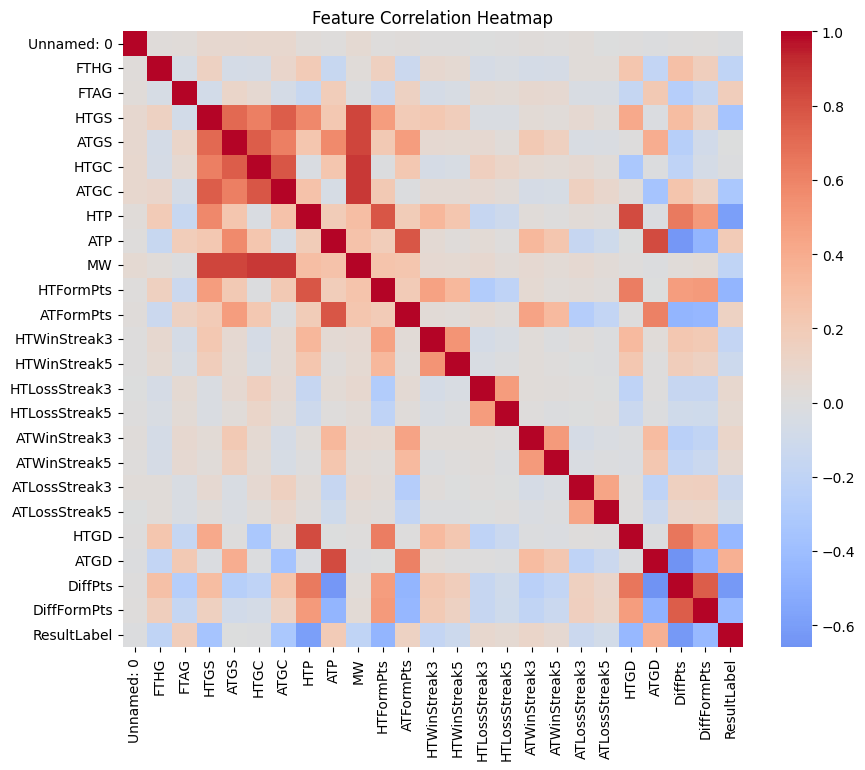

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_dataset.csv")
df['ResultLabel'] = df.apply(lambda row: 0 if row['HTP'] > row['ATP'] else (1 if row['HTP'] < row['ATP'] else 2), axis=1)
df = df.select_dtypes(include=['number'])

plt.figure(figsize=(6,4))
sns.countplot(x='ResultLabel', data=df)
plt.title("Distribution of Match Results (0: Home Win, 1: Away Win, 2: Draw)")
plt.show()

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


## Data Cleaning
We removed:
- Match outcome and half-time result columns to avoid leakage
- Team names and dates (identifiers)
- Derived point columns (`HTP`, `ATP`, `DiffPts`) since they directly determine the label
- All non-numeric features

## Model Building and Evaluation

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("final_dataset.csv")
df['ResultLabel'] = df.apply(lambda row: 0 if row['HTP'] > row['ATP'] else (1 if row['HTP'] < row['ATP'] else 2), axis=1)
drop_cols = ['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Date', 'HomeTeam', 'AwayTeam', 'HTP', 'ATP', 'DiffPts']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')
df = df.select_dtypes(include=['number'])

X = df.drop(columns=['ResultLabel'])
y = df['ResultLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("MLP Report:\n", classification_report(y_test, y_pred_mlp))


Random Forest Accuracy: 0.8961988304093568
Random Forest Confusion Matrix:
 [[579  50   2]
 [ 63 574   0]
 [ 14  13  73]]
Random Forest Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       631
           1       0.90      0.90      0.90       637
           2       0.97      0.73      0.83       100

    accuracy                           0.90      1368
   macro avg       0.92      0.85      0.88      1368
weighted avg       0.90      0.90      0.90      1368

MLP Accuracy: 0.7785087719298246
MLP Confusion Matrix:
 [[617  14   0]
 [205 402  30]
 [ 48   6  46]]
MLP Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.82       631
           1       0.95      0.63      0.76       637
           2       0.61      0.46      0.52       100

    accuracy                           0.78      1368
   macro avg       0.76      0.69      0.70      1368
weighted avg       0.81      0.78

## Feature Importance

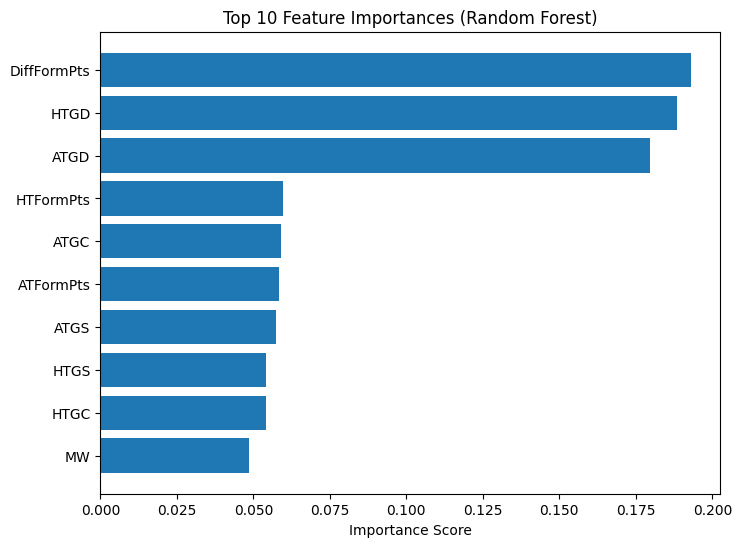

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

importances = {'Feature': ['DiffFormPts', 'HTGD', 'ATGD', 'HTFormPts', 'ATGC', 'ATFormPts', 'ATGS', 'HTGS', 'HTGC', 'MW', 'Unnamed: 0', 'ATWinStreak3', 'ATLossStreak3', 'HTWinStreak3', 'HTLossStreak3', 'HTWinStreak5', 'HTLossStreak5', 'ATLossStreak5', 'ATWinStreak5'], 'Importance': [0.19297545173251915, 0.18857163704797145, 0.1796861857480355, 0.05976239680630095, 0.059145200292464895, 0.05850082477303774, 0.05736505511220989, 0.05424738110084817, 0.05405576594878484, 0.04871607894839189, 0.03471905990089832, 0.003083197020679718, 0.002853469349500445, 0.0023468307516163194, 0.002067547410582371, 0.0008337493045619781, 0.00036422570178902406, 0.00036188645171488393, 0.0003440565980925233]}
importance_df = pd.DataFrame(importances)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


## Conclusion
- Random Forest achieved 89.62% accuracy
- MLP achieved 77.85% accuracy

Random Forest outperformed MLP and provided useful feature importance insights. I think there is promise with MLP however, because we could definitely add more layers here. Also, ideally, we would extend this project across tons and tons of relevant data like player injuries, player form, weather, etc. 
